In [1]:
import csv
import numpy as np

In [26]:
from matplotlib import pyplot as plt

In [2]:
n = 10000

In [3]:
M = np.zeros((n, n))

In [4]:
with open('co_occur.csv') as f:
    ls = csv.reader(f)
    for (i, row) in enumerate(ls):
        for j in range(n):
            M[i, j] = np.log(1 + float(row[j]))

In [17]:
U, S, Vh = np.linalg.svd(M)

MemoryError: 

In [18]:
def K_approximation(K):
    u = U[:, :K]
    s = S[:K]
    vh = Vh[:K, :]
    
    with open('u.csv','wb') as f:    
        myWriter=csv.writer(f)
        for i in range(n):
            myWriter.writerow(u[i, :])
    with open('s.csv','wb') as f:    
        myWriter=csv.writer(f)
        for i in range(K):
            myWriter.writerow(s[i])
    with open('vh.csv','wb') as f:    
        myWriter=csv.writer(f)
        for i in range(K):
            myWriter.writerow(u[i, :])

In [ ]:
K_approximation(100)

In [5]:
def readSVD():
    u = np.zeros((n, 100))
    s = np.zeros((100,))
    vh = np.zeros((100, n))
    
    f = open("u.csv")
    ls = list(csv.reader(f))
    for i in range(n):
        for j in range(100):
            u[i, j] = ls[i][j]
    
    f = open("s.csv")
    ls = list(csv.reader(f))
    for i in range(100):
        s[i] = ls[i][0]
    
    f = open("vh.csv")
    ls = list(csv.reader(f))
    for i in range(100):
        for j in range(n):
            vh[i, j] = ls[i][j]
    
    return u, s, vh

In [6]:
u, s, vh = readSVD()

In [7]:
def find_closest(x):
    projection = [(0, 0) for i in range(n)]
    for i in range(n):
        y = M[i]
        projection[i] = (abs(sum(x * y)), i)
    projection.sort()
    return projection[:10], projection[-10:]

In [8]:
find_closest(u[:, 0])

([(12.663322220058058, 6823),
  (14.605295068948537, 9803),
  (16.357550170720117, 2808),
  (21.111754621181216, 9859),
  (24.4857941914863, 4610),
  (24.591252786577034, 9548),
  (26.704135597947243, 8785),
  (27.76571462832326, 9276),
  (28.67588979258664, 6070),
  (31.38198744057669, 6651)],
 [(629.0287007715087, 5),
  (631.7003054196559, 11),
  (631.8589240485879, 6),
  (632.8805341344008, 9),
  (641.7830265553713, 7),
  (707.2729728027776, 4),
  (744.1258719654545, 2),
  (756.6626287028794, 1),
  (772.0137338872685, 3),
  (825.8920926453885, 0)])

In [11]:
dictionary = []
with open("dictionary.txt") as f:
    global dictionary
    dictionary = f.readlines()
    dictionary = list(map(lambda l: l.strip(), dictionary))

In [14]:
def get_closest_words(x):
    p1, p2 = find_closest(x)
    w1 = []
    w2 = []
    for i in range(10):
        w1.append(dictionary[p1[i][1]])
        w2.append(dictionary[p2[i][1]])
    return w1, w2

In [15]:
def part1_c():
    for i in range(5):
        x = u[:, i]
        w1, w2 = get_closest_words(x)
        print("For vector {}, the most similar words are {}".format(i, w1))
        print("For vector {}, the least similar words are {}".format(i, w2))

In [16]:
part1_c()

For vector 0, the most similar words are ['gmina', 'insee', 'householder', 'increment', 'peakposition', 'midst', 'outskirts', 'iucn', 'voivodeship', 'subtropical']
For vector 0, the least similar words are ['was', 'with', 'is', 'as', 'for', 'to', 'in', 'of', 'and', 'the']
For vector 1, the most similar words are ['fred', 'animal', 'names', 'normally', 'matt', 'zone', 'runs', 'hot', 'why', 'russell']
For vector 1, the least similar words are ['is', 'by', 'as', 'with', 'for', 'to', 'in', 'of', 'and', 'the']
For vector 2, the most similar words are ['circle', 'headquartered', 'nursery', 'constantinople', 'put', 'bravery', 'basement', 'conspiracy', 'burnt', 'serves']
For vector 2, the least similar words are ['michael', 'thomas', 'george', 'jr', 'william', 'robert', 'david', 'james', 'john', 'born']
For vector 3, the most similar words are ['range', 'empress', 'extensions', 'valued', 'horace', 'fisher', 'severely', 'elder', 'soil', 'witnessed']
For vector 3, the least similar words are ['m

In [19]:
norm_u = np.zeros((n, 100))
for i in range(n):
    norm_u[i] = u[i] / np.linalg.norm(u[i])

In [25]:
def findword(w):
    for i in range(n):
        if dictionary[i] == w:
            return i
    return None

In [37]:
def part1_d_1():
    v1 = norm_u[findword("woman")]
    v2 = norm_u[findword("man")]
    v = v1 - v2
    words = ["boy", "girl", "brother", "sister", "king", "queen", "he", "she", "john", "mary", "wall", "tree"]
    for w in words:
        vec = norm_u[findword(w)]
        p = sum(v * vec)
        plt.plot(p, 0, ".", label = w)
    plt.legend()
    plt.savefig("part1_d_1.png")
    plt.show()

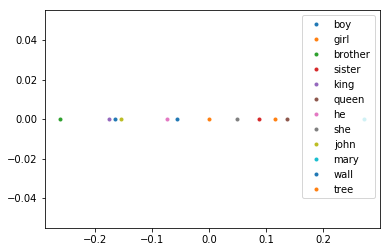

In [38]:
part1_d_1()

In [39]:
def part1_d_2():
    v1 = norm_u[findword("woman")]
    v2 = norm_u[findword("man")]
    v = v1 - v2
    words = ["math", "matrix", "history", "nurse", "doctor", "pilot", "teacher", "engineer", "science", "arts", "literature", "bob", "alice"]
    for w in words:
        vec = norm_u[findword(w)]
        p = sum(v * vec)
        plt.plot(p, 0, ".", label = w)
    plt.legend()
    plt.savefig("part1_d_2.png")
    plt.show()

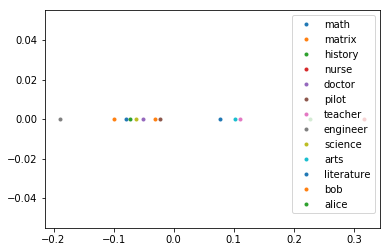

In [40]:
part1_d_2()

In [41]:
def cos_similarity(x, y):
    return sum(x * y)

In [48]:
def part1_e_1():
    index = findword("stanford")
    w1 = norm_u[index]
    dis = 0
    pos = -1
    for i in range(n):
        if i == index:
            continue
        w2 = norm_u[i]
        d = cos_similarity(w1, w2)
        if d > dis:
            dis = d
            pos = i
    return dictionary[pos]

In [49]:
part1_e_1()

'cornell'

In [87]:
def guess_word(w1, w2, w3):
    id1 = findword(w1)
    id2 = findword(w2)
    id3 = findword(w3)
    w1 = norm_u[id1] - norm_u[id2] + norm_u[id3]
#     dis, pos = 0, -1
#     for i in range(n):
#         if i == id1 or i == id2 or i == id3:
#             continue
#         w2 = norm_u[i]
#         d = cos_similarity(w1, w2)
#         if d > dis:
#             dis = d
#             pos = i
    tmp = np.dot(norm_u, w1.T)
    dis, pos = 0, -1
    for i in range(n):
        if i == id1 or i == id2 or i == id3:
            continue
        if tmp[i] > dis:
            dis = tmp[i]
            pos = i
    return dictionary[pos]

In [88]:
guess_word("woman", "man", "king")

'queen'

In [74]:
def part1_e_2():
    with open("analogy_task.txt") as f:
        ls = f.readlines()
        tot, right = 0, 0
        for l in ls:
            tot += 1
            ws = l.strip().split()
            guess = guess_word(ws[1], ws[0], ws[2])
            if guess == ws[3]:
                right += 1
            if tot < 10:
                print(tot, "True answer is {}, you guess {}".format(ws[3], guess))
            if tot % 100 == 0:
                print(tot)
        return right / tot

In [89]:
part1_e_2()

1 True answer is thailand, you guess thailand
2 True answer is china, you guess korea
3 True answer is germany, you guess germany
4 True answer is egypt, you guess morocco
5 True answer is australia, you guess iceland
6 True answer is finland, you guess iceland
7 True answer is england, you guess ireland
8 True answer is spain, you guess argentina
9 True answer is russia, you guess russia
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500


0.5498657117278425